#         Feature Engineering and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('House_data_cleaned.csv')
df.head()

,area_type,availability,location,total_sqft,bath,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,2


Text(0, 0.5, 'Price')

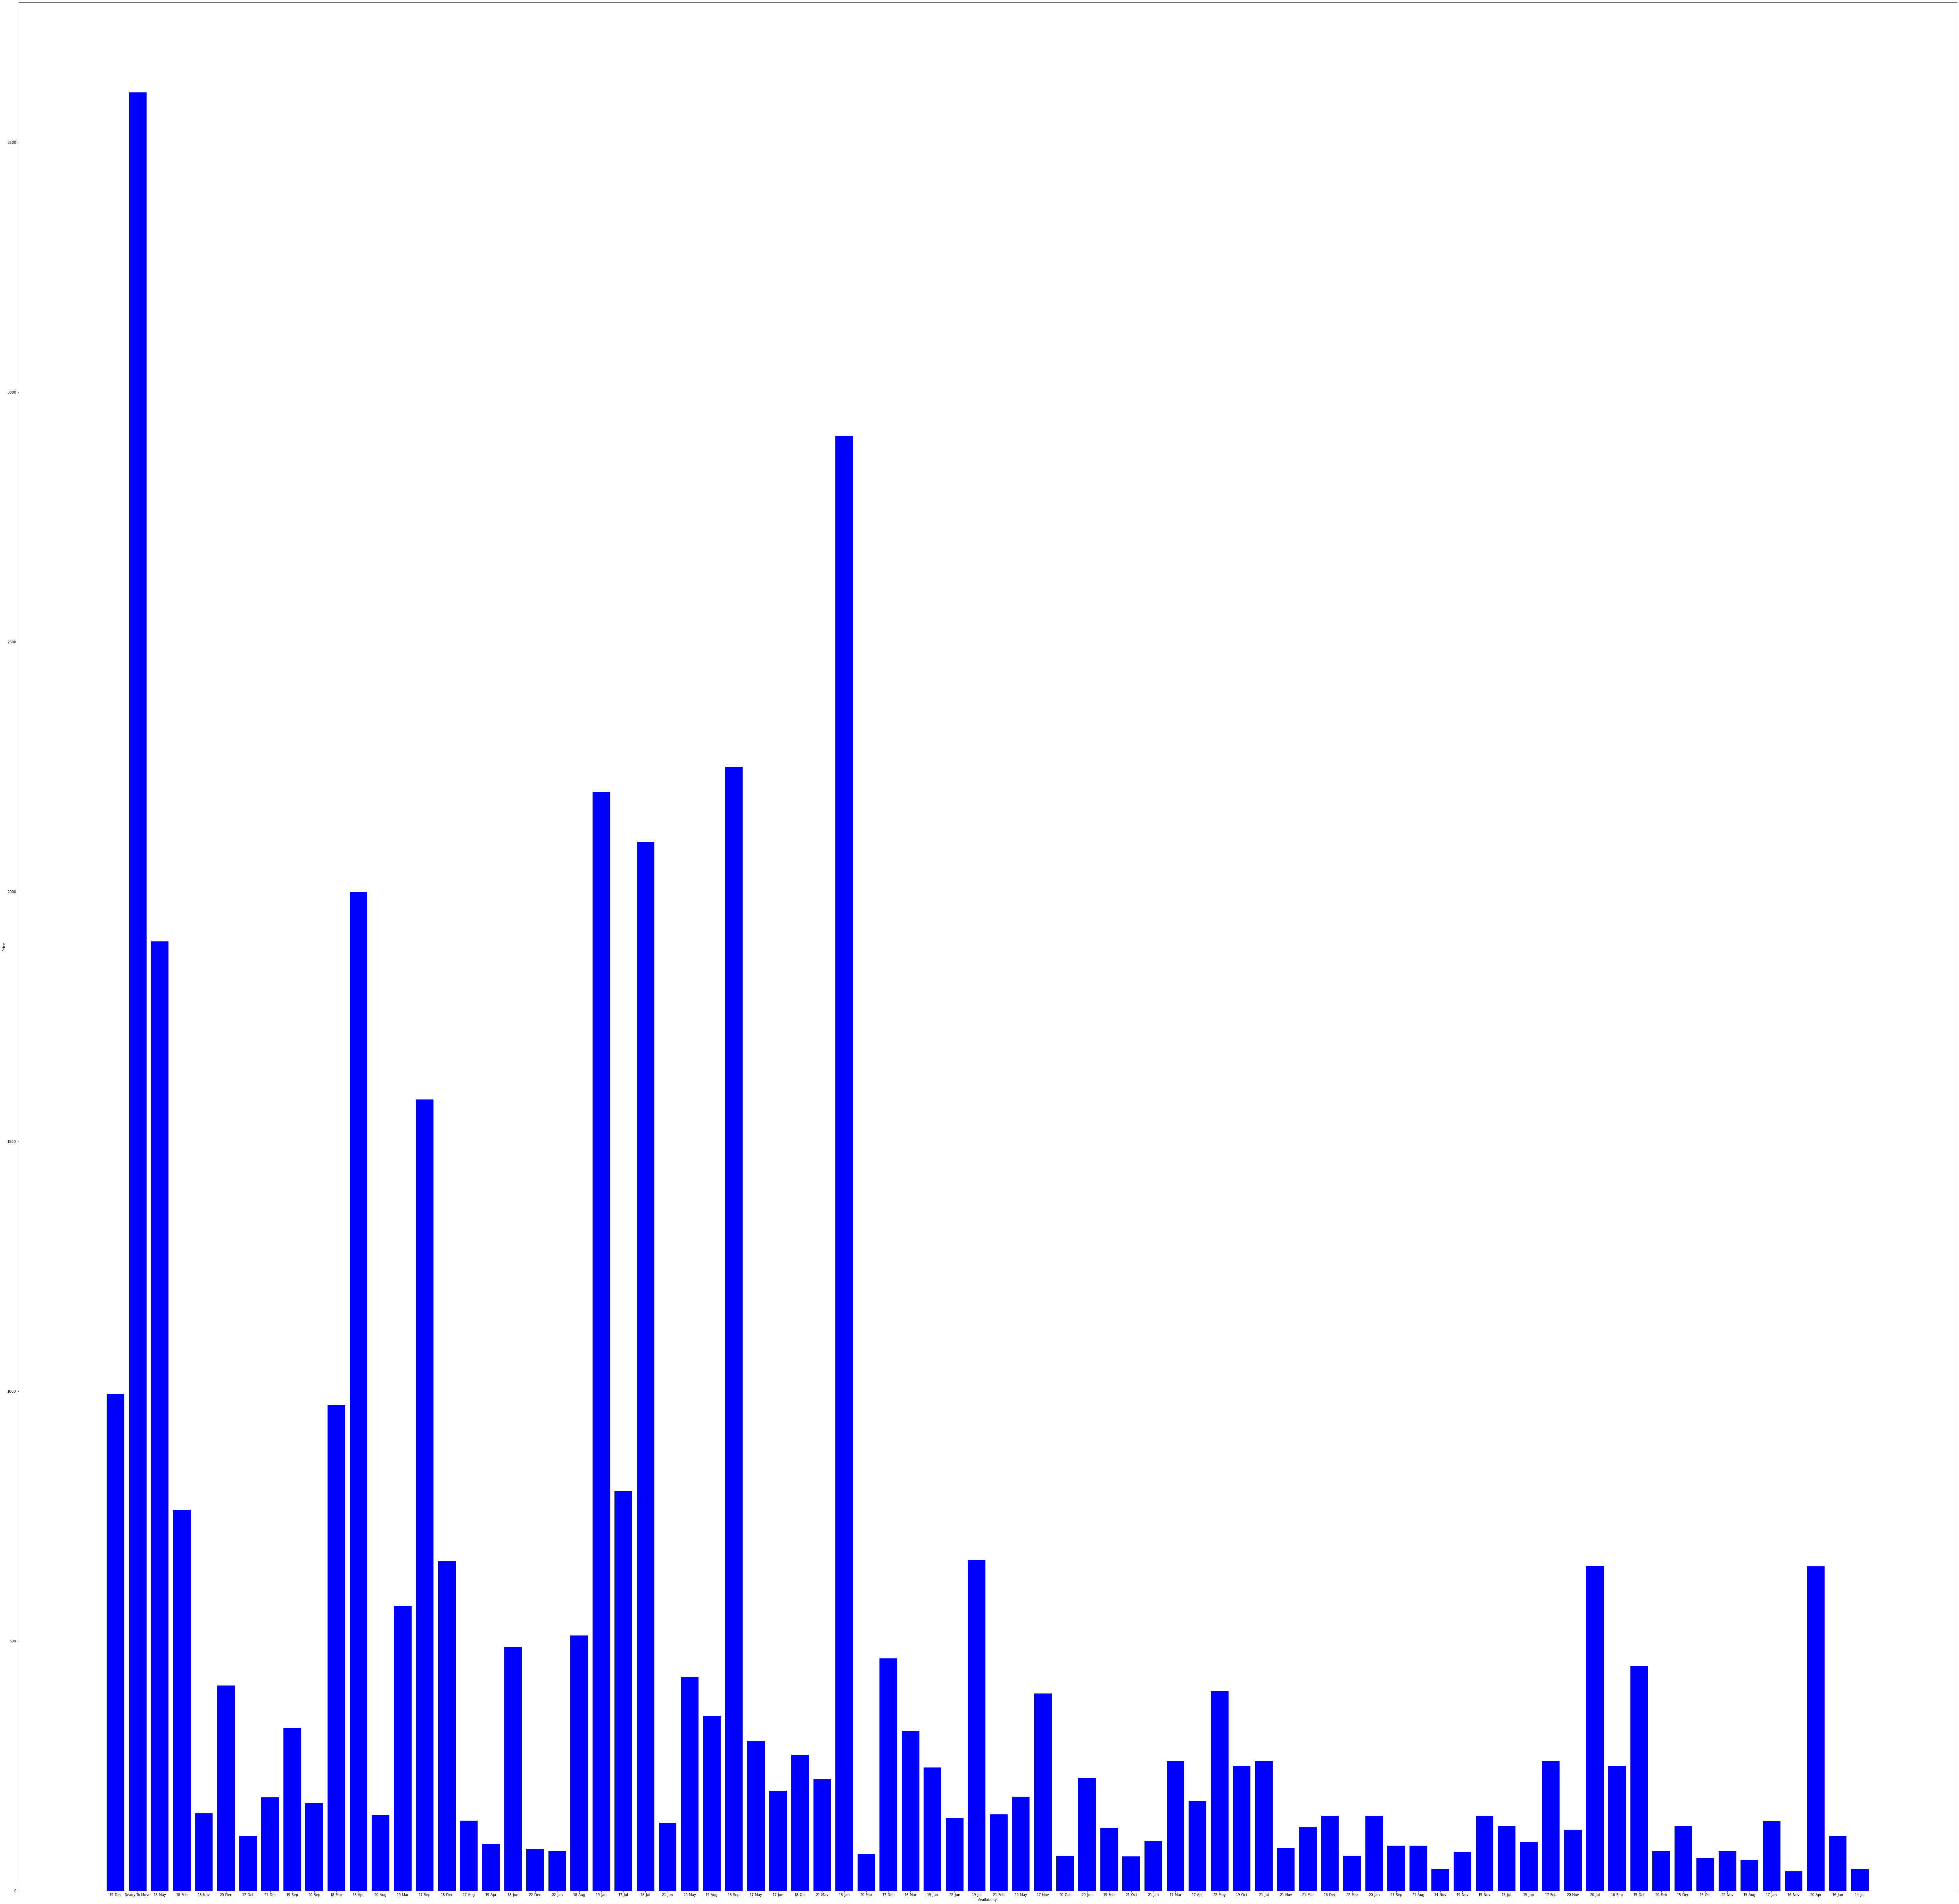

In [3]:
plt.figure(figsize=(100,100))
plt.bar(df.availability, df.price, color='blue')
plt.xlabel('Availability')
plt.ylabel('Price')

In [4]:
# Availability column is being dropped die to its insignificance
df = df.drop('availability',axis='columns')

Text(0, 0.5, 'Price')

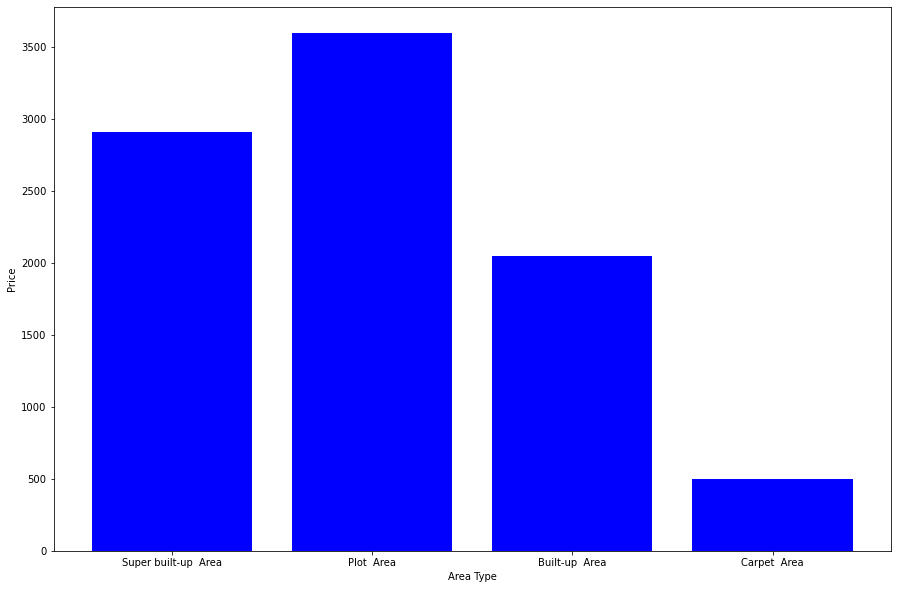

In [5]:
plt.figure(figsize=(15,10))
plt.bar(df.area_type, df.price, color='blue')
plt.xlabel('Area Type')
plt.ylabel('Price')

In [6]:
df.shape

(13200, 6)

In [7]:
df.head()

,area_type,location,total_sqft,bath,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [8]:
# The price is lakhs so every numeric value in the price 
# column is multiplies by 100000 and divided by the its 
# corresponding total_sqft

df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [9]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# Dimensionality Reduction 

In [10]:
# All the areas where house are located and their respective 
# number of units
# df.location = df.location.apply(lambda x : x.strip())
location_stats = df.location.value_counts(ascending=False)
location_stats

Whitefield                                  532
Sarjapur  Road                              392
Electronic City                             302
Kanakpura Road                              264
Thanisandra                                 232
                                           ... 
Kanakapura main  Road                         1
Karnataka Shabarimala                         1
Chokkahalli                                   1
Banashankari 3rd stage, Vivekanandanagar      1
Udayagiri                                     1
Name: location, Length: 1298, dtype: int64

In [11]:
# Since there are many location, locations with less
# than 10 units are groupred as 'other'

df.location = df['location'].apply(lambda x : 'other' if x in location_stats[location_stats<=10] else x)
len(df.location.unique())

241

# Outlier Removal

In [12]:
df[df.total_sqft/df.bedrooms<300].head()

,area_type,location,total_sqft,bath,price,bedrooms,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
57,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
67,Plot Area,other,1350.0,7.0,85.0,8,6296.296296
69,Plot Area,other,500.0,3.0,100.0,3,20000.000000


In [13]:
# Removing outliers

df = df[~(df.total_sqft/df.bedrooms<300)]
df.shape

(12456, 7)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sqft,12456.0,1590.189927,1260.404795,300.000000,1115.000000,1300.000000,1700.000000,52272.000000
bath,12456.0,2.562781,1.080275,1.000000,2.000000,2.000000,3.000000,16.000000
price,12456.0,111.187960,152.203367,9.000000,49.000000,70.000000,115.000000,3600.000000
bedrooms,12456.0,2.649004,0.976046,1.000000,2.000000,3.000000,3.000000,16.000000
price_per_sqft,12456.0,6308.502826,4168.127339,267.829813,4210.526316,5294.117647,6916.666667,176470.588235


In [15]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-sd)) & 
                         (subdf.price_per_sqft<=(mean+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_outliers(df)
df.shape

(10245, 7)

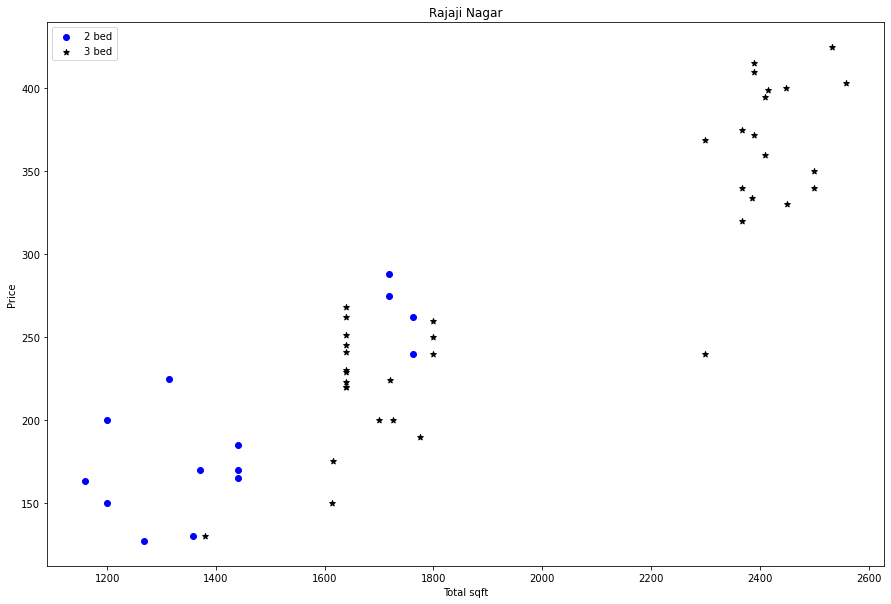

In [16]:
# Scatter plot to look at areas where two bedroom prices
# are higher than three bedroom prices even though 
# they have the same area

def scatter_plt(df,location):
    two_bed = df[(df.location==location) & (df.bedrooms==2)]
    three_bed = df[(df.location==location) & (df.bedrooms==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(two_bed.total_sqft, two_bed.price, color='blue', label='2 bed')
    plt.scatter(three_bed.total_sqft, three_bed.price, marker="*", color='black', label='3 bed')
    plt.xlabel('Total sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

scatter_plt(df, 'Rajaji Nagar')
    

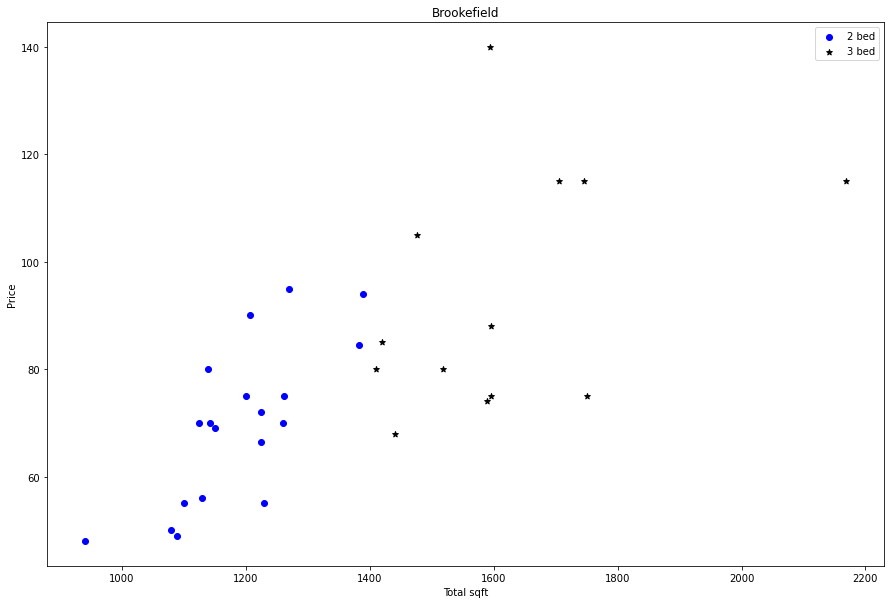

In [18]:
scatter_plt(df, 'Brookefield')

In [20]:
# Removing 2 bedr0om apartments which have 
# price_per_sqft less than the mean price_per_sqft 
# 1 bedroom apartment

def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bed_stats = {}
        for bed, df_bed in location_df.groupby('bedrooms'):
            bed_stats[bed]={
                'mean':np.mean(df_bed.price_per_sqft),
                'std':np.std(df_bed.price_per_sqft),
                'count': df_bed.shape[0]
            }
        for bed, df_bed in location_df.groupby('bedrooms'):
            stats = bed_stats.get(bed-1)
            if(stats) and stats['count']>5:
                exclude_indices = np.append(exclude_indices, df_bed[df_bed.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df = remove_bedroom_outliers(df)
df.shape

(7331, 7)

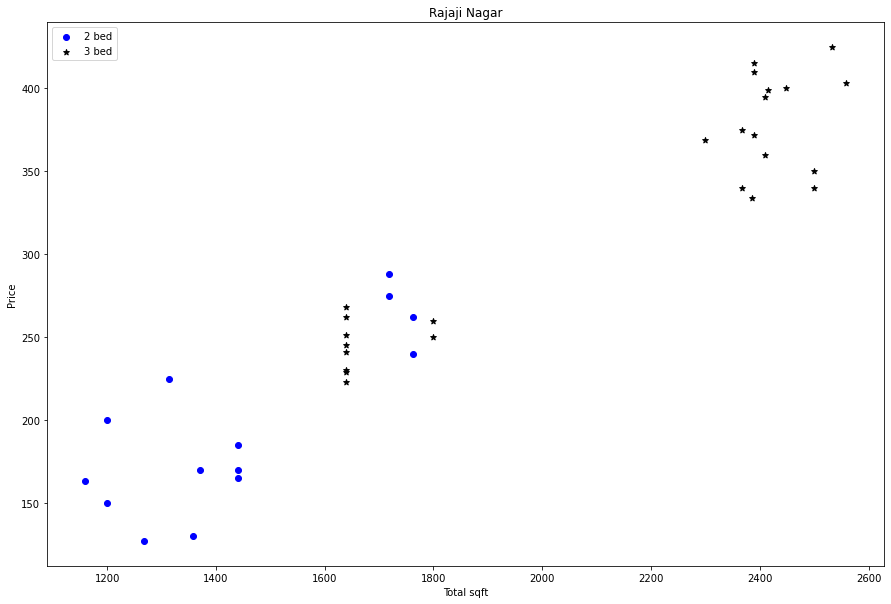

In [21]:
scatter_plt(df, 'Rajaji Nagar')

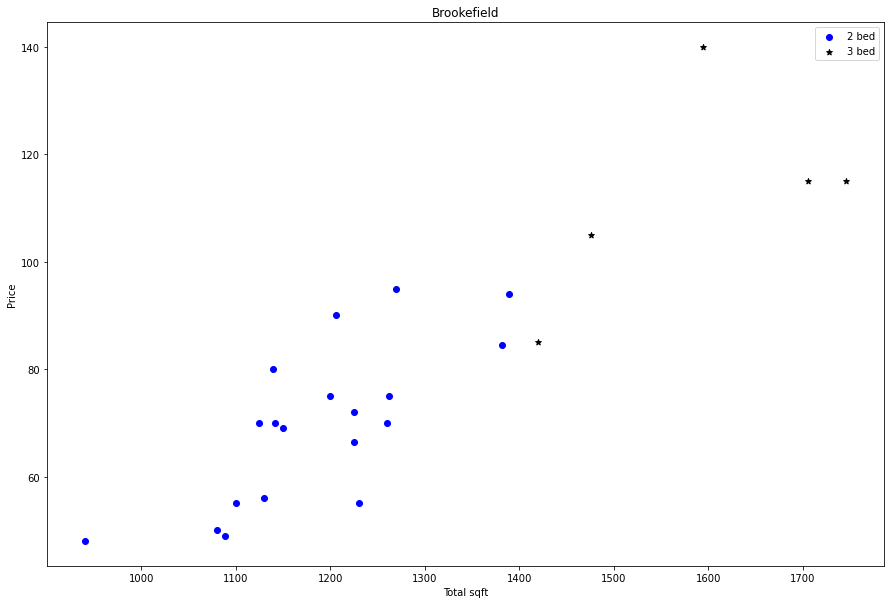

In [22]:
scatter_plt(df, 'Brookefield')

In [23]:
# Removing those apartments with number of bathrooms
# exceeding the number of bedrooms by 2

df = df[df.bedrooms+2>df.bath]
df.head()

,area_type,location,total_sqft,bath,price,bedrooms,price_per_sqft
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [25]:
# Dropping features that are not required further
df = df.drop(['price_per_sqft'], axis='columns')

In [27]:
df.shape

(7253, 6)

In [28]:
# One Hot Encoding location

dummies = pd.get_dummies(df.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = pd.concat([df.drop('location', axis='columns'), dummies.drop('other', axis='columns')], axis='columns')
df.head()

,area_type,total_sqft,bath,price,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [36]:
# One hot encoding area_type

dummies = pd.get_dummies(df.area_type)
df = pd.concat([df.drop('area_type', axis='columns'), dummies.drop('Super built-up  Area', axis='columns')], axis='columns')
df.head()

,total_sqft,bath,price,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.to_csv('House_data_EDA.csv', index=False)